# Lab 2

In [238]:
import numpy as np

## Part 1

• Write a program to implement Needleman-Wunsch for proteins

• Check that it is working using HEAGAWGHEE versus PAWHEAE

• Compare to slide 60 in Lecture 09 - Sequence matching.

• Match the protein sequences using your implementation
    SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL with PSPTMEAVTSVEASTASHPHSTSSYFATTYYHLY

The Needleman-Wunsch algorithm aligns two sequences by assigning scores to matches, mismatches, and gaps. The chosen path direction is the one with the highest score. The algorithm traces back using these directions to find the optimal alignment.

In [239]:
blosum50 = np.genfromtxt("blosum50.txt", dtype=int)

def blosum_lookup(prot1,prot2):
  amino_acids = dict(zip(['-','A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V'], [i for i in range(len(blosum50))]))
  return blosum50[amino_acids[prot1], amino_acids[prot2]]

In [240]:
def needleman_wunsch(str1, str2, cost):
    n = len(str1)
    m = len(str2)
    score_matrix = np.zeros((n+1,m+1))
    direction_matrix = np.zeros((n+1,m+1))

    # 1 - mismatch (vertical)
    # 2 - indel (horizontal)
    # 3 - match (diagonal)

    for i in range(1, n+1):
        score_matrix[i,0] = score_matrix[i-1,0] + cost
        direction_matrix[i,0] = 1
    for j in range(1, m+1):
        score_matrix[0,j] = score_matrix[0,j-1] + cost
        direction_matrix[0,j] = 2

    for i in range(1, n+1):
        for j in range(1, m+1):
            blosumScore = blosum_lookup(str1[i-1], str2[j-1])
            match = score_matrix[i-1,j-1] + blosumScore
            mismatch = score_matrix[i-1,j] + cost
            indel = score_matrix[i,j-1] + cost
            
            score = max(match, mismatch, indel)
            score_matrix[i,j] = score

            if score == match:
                direction_matrix[i,j] = 3
            elif score == mismatch:
                direction_matrix[i,j] = 1
            else:
                direction_matrix[i,j] = 2

    print(score_matrix)
    print(direction_matrix)

    alignment1 = ''
    alignment2 = ''

    while n > 0 or m > 0:
        if direction_matrix[n,m] == 3:
            alignment1 = str1[n-1] + alignment1
            alignment2 = str2[m-1] + alignment2
            n = n - 1
            m = m - 1
        elif direction_matrix[n,m] == 2:
            alignment1 = '-' + alignment1
            alignment2 = str2[m-1] + alignment2
            m = m - 1
        else:
            alignment1 = str1[n-1] + alignment1
            alignment2 = '-' + alignment2
            n = n - 1

    print(alignment1)
    print(alignment2)

In [241]:
needleman_wunsch("HEAGAWGHEE","PAWHEAE", -8)

[[  0.  -8. -16. -24. -32. -40. -48. -56.]
 [ -8.  -2. -10. -18. -14. -22. -30. -38.]
 [-16.  -9.  -3. -11. -18.  -8. -16. -24.]
 [-24. -17.  -4.  -6. -13. -16.  -3. -11.]
 [-32. -25. -12.  -7.  -8. -16. -11.  -6.]
 [-40. -33. -20. -15.  -9.  -9. -11. -12.]
 [-48. -41. -28.  -5. -13. -12. -12. -14.]
 [-56. -49. -36. -13.  -7. -15. -12. -15.]
 [-64. -57. -44. -21.  -3.  -7. -15. -12.]
 [-72. -65. -52. -29. -11.   3.  -5.  -9.]
 [-80. -73. -60. -37. -19.  -5.   2.   1.]]
[[0. 2. 2. 2. 2. 2. 2. 2.]
 [1. 3. 3. 2. 3. 2. 2. 2.]
 [1. 3. 3. 2. 3. 3. 2. 3.]
 [1. 3. 3. 3. 3. 1. 3. 2.]
 [1. 1. 1. 3. 3. 3. 1. 3.]
 [1. 3. 3. 3. 3. 3. 3. 3.]
 [1. 1. 1. 3. 2. 3. 3. 3.]
 [1. 1. 1. 1. 3. 2. 3. 3.]
 [1. 1. 1. 1. 3. 3. 2. 3.]
 [1. 3. 1. 1. 1. 3. 2. 3.]
 [1. 3. 1. 1. 1. 3. 3. 3.]]
HEAGAWGHE-E
--P-AW-HEAE


In [242]:
needleman_wunsch("SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL", "PSPTMEAVTSVEASTASHPHSTSSYFATTYYHLY",-8)

[[   0.   -8.  -16. ... -256. -264. -272.]
 [  -8.   -1.   -3. ... -243. -251. -259.]
 [ -16.   -9.    0. ... -230. -238. -246.]
 ...
 [-248. -230. -217. ...    5.   -3.  -11.]
 [-256. -238. -225. ...   10.    3.   -5.]
 [-264. -246. -233. ...    2.   15.    7.]]
[[0. 2. 2. ... 2. 2. 2.]
 [1. 3. 3. ... 2. 2. 2.]
 [1. 3. 3. ... 2. 2. 2.]
 ...
 [1. 1. 3. ... 3. 2. 2.]
 [1. 1. 1. ... 3. 3. 3.]
 [1. 1. 1. ... 1. 3. 2.]]
-SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL-
PSPTMEAVTSVEA-STASHPHSTSSYFATTYYHLY


## Part 2

•Write a program to implement Smith-Waterman for proteins

The Smith-Waterman algorithm implementation is essentially the same as Needleman-Wunsch except an option to ignore match puts the value 0. The backwards traceback also starts at the highest value found and continues until a 0 value is met.

In [243]:
def smith_waterman(str1, str2, cost):
    n = len(str1)
    m = len(str2)
    score_matrix = np.zeros((n+1,m+1))
    direction_matrix = np.zeros((n+1,m+1))

    # 1 - mismatch (vertical)
    # 2 - indel (horizontal)
    # 3 - match (diagonal)

    max_score = 0
    max_i = 0
    max_j = 0

    for i in range(1, n+1):
        for j in range(1, m+1):
            blosumScore = blosum_lookup(str1[i-1], str2[j-1])
            match = score_matrix[i-1,j-1] + blosumScore
            mismatch = score_matrix[i-1,j] + cost
            indel = score_matrix[i,j-1] + cost
            
            score = max(0, match, mismatch, indel)
            score_matrix[i,j] = score

            if score == match:
                direction_matrix[i,j] = 3
            elif score == mismatch:
                direction_matrix[i,j] = 1
            else:
                direction_matrix[i,j] = 2

            if score >= max_score:
                max_score = score
                max_i = i
                max_j = j

    print(score_matrix)
    print(direction_matrix)

    print(max_i)
    print(max_j)
    print(max_score)

    alignment1 = ''
    alignment2 = ''

    while max_i > 0 and max_j > 0 and score_matrix[max_i,max_j] > 0:
        if direction_matrix[max_i,max_j] == 3:
            alignment1 = str1[max_i-1] + alignment1
            alignment2 = str2[max_j-1] + alignment2
            max_i = max_i - 1
            max_j = max_j - 1
        elif direction_matrix[max_i,max_j] == 2:
            alignment1 = '-' + alignment1
            alignment2 = str2[max_j-1] + alignment2
            max_j = max_j - 1
        else:
            alignment1 = str1[max_i-1] + alignment1
            alignment2 = '-' + alignment2
            max_i = max_i - 1

    print(alignment1)
    print(alignment2)

•Check that it is working using HEAGAWGHEE versus PAWHEAE

•Compare to slide 34 in Lecture 10 - Local Matching

In [244]:
smith_waterman("HEAGAWGHEE","PAWHEAE", -8)

[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 10.  2.  0.  0.]
 [ 0.  0.  0.  0.  2. 16.  8.  6.]
 [ 0.  0.  5.  0.  0.  8. 21. 13.]
 [ 0.  0.  0.  2.  0.  0. 13. 18.]
 [ 0.  0.  5.  0.  0.  0.  5. 12.]
 [ 0.  0.  0. 20. 12.  4.  0.  4.]
 [ 0.  0.  0. 12. 18. 10.  4.  0.]
 [ 0.  0.  0.  4. 22. 18. 10.  4.]
 [ 0.  0.  0.  0. 14. 28. 20. 16.]
 [ 0.  0.  0.  0.  6. 20. 27. 26.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 2. 2. 3. 2. 2. 3.]
 [0. 2. 2. 2. 1. 3. 2. 3.]
 [0. 2. 3. 2. 2. 1. 3. 2.]
 [0. 2. 3. 3. 2. 1. 1. 3.]
 [0. 2. 3. 2. 3. 2. 3. 3.]
 [0. 2. 2. 3. 2. 2. 2. 1.]
 [0. 2. 3. 1. 3. 2. 3. 2.]
 [0. 2. 2. 1. 3. 3. 2. 3.]
 [0. 2. 2. 2. 1. 3. 2. 3.]
 [0. 2. 2. 2. 1. 3. 3. 3.]]
9
5
28.0
AWGHE
AW-HE


•Using your implementation find the best local match between
MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRY
and TDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI

In [245]:
smith_waterman("MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRY", "TDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI", -8)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   2.]
 [  0.   0.   0. ...   2.   1.   0.]
 ...
 [  0.   0.   0. ... 141. 156. 169.]
 [  0.   0.   0. ... 133. 148. 161.]
 [  0.   0.   0. ... 125. 140. 153.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 2. 2. ... 2. 2. 3.]
 [0. 2. 3. ... 3. 3. 2.]
 ...
 [0. 2. 2. ... 1. 1. 1.]
 [0. 2. 2. ... 1. 3. 1.]
 [0. 2. 2. ... 1. 1. 1.]]
45
46
273.0
HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRI
HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI


## Part 3

•Implement an HMM to mimic the dishonest casino in the slides (Lecture 11 HMM pg 7).

In [246]:
from hmmlearn import hmm
import matplotlib.pyplot as plt

In [247]:
import pandas as pd

def display_colored(states, labels):
    text = ''
    for state in states:
        if state == labels[0]:
            text += '\033[91m{}\033[0m'.format(labels[0] + " ")
        elif state == labels[1]:
            text += '\033[92m{}\033[0m'.format(labels[1] + " ")
    print(text)

def display_states(states, labels):
    states_categorical = pd.Categorical(states, categories=labels, ordered=True)
    states_ordered = pd.Series(states_categorical.codes, dtype='category')

    plt.figure(figsize=(10, 2))
    plt.plot(states_ordered, color='blue')
    plt.yticks(range(len(labels)), labels)
    plt.xlabel('Time Step')
    plt.ylabel('State')
    plt.title('State Sequence')
    plt.grid(True)
    plt.show()

In [248]:
def dishonest_casino():
    model = hmm.CategoricalHMM(n_components=2)

    model.startprob_ = np.array([1.0, 0.0])
    model.transmat_ = np.array([[0.9, 0.1],
                                [0.1, 0.9]])
    model.emissionprob_ = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
                                    [1/10, 1/10, 1/10, 1/10, 1/10, 1/2]])

    rolls, states = model.sample(64)

    roll_nums = [1, 2, 3, 4, 5, 6]
    state_labels = ['F', 'L']

    seq_readable = [roll_nums[symbol] for symbol in rolls.flatten()]
    states_readable = [state_labels[state] for state in states]

    return model, seq_readable, states_readable

•Produce a human readable output with both the sequence of numbers and the sequence
of states.

•Compare your output to that generated on page 36.

Number:
[6, 2, 1, 3, 4, 5, 1, 6, 1, 1, 4, 1, 6, 4, 6, 2, 3, 2, 4, 1, 5, 4, 3, 6, 6, 2, 6, 4, 6, 6, 6, 4, 5, 1, 6, 4, 5, 6, 4, 6, 2, 6, 6, 6, 5, 6, 6, 5, 4, 2, 3, 1, 6, 4, 6, 2, 6, 6, 6, 1, 6, 6, 6, 1]
State:
F F F F F F F F F L L L L L L L L L F F F F F F L L L L L L L L F F F F F L L L L L L L L L L L L L F F L L L L L L L L L L L F 


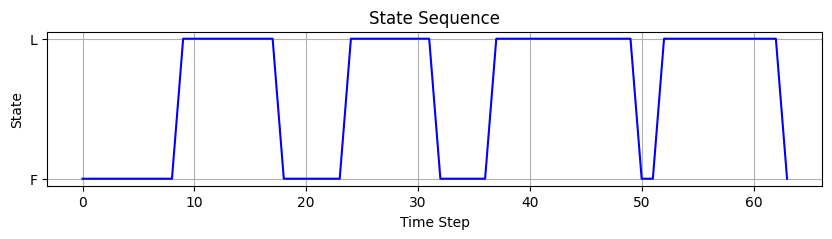

In [249]:
model, seq, states = dishonest_casino()

labels = ['F', 'L']

print("Number:")
print(seq)
print("State:")
display_colored(states, labels)
display_states(states, labels)

In [250]:
def dna_sequence_generator():
    model = hmm.CategoricalHMM(n_components=2)

    model.startprob_ = np.array([0.5, 0.5])
    model.transmat_ = np.array([[0.9997, 0.0003],
                                [0.0002, 0.9998]])
    model.emissionprob_ = np.array([[0.2698, 0.3237, 0.2080, 0.1985],
                                    [0.2459, 0.2079, 0.2478, 0.2984]])

    seq, states = model.sample(2000)

    dna_symbols = ['A', 'T', 'C', 'G']
    state_labels = ['AT', 'CG']

    seq_readable = [dna_symbols[symbol] for symbol in seq.flatten()]
    states_readable = [state_labels[state] for state in states]

    return model, seq_readable, states_readable

•Implement an HMM to generate DNA bases along the model below. Use it to generate a
long (ca 2000) base sequence

•Find some way to display this series

Base:
['T', 'C', 'G', 'T', 'A', 'T', 'T', 'G', 'T', 'T', 'A', 'T', 'T', 'A', 'A', 'G', 'T', 'G', 'A', 'C', 'T', 'T', 'G', 'A', 'C', 'A', 'T', 'C', 'T', 'A', 'A', 'A', 'A', 'C', 'T', 'A', 'A', 'G', 'A', 'T', 'G', 'C', 'T', 'G', 'T', 'C', 'A', 'T', 'G', 'C', 'C', 'T', 'T', 'A', 'T', 'T', 'G', 'G', 'C', 'G', 'T', 'G', 'A', 'G', 'C', 'C', 'T', 'C', 'T', 'C', 'G', 'A', 'G', 'T', 'C', 'T', 'T', 'T', 'A', 'C', 'A', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'T', 'C', 'C', 'A', 'T', 'C', 'A', 'T', 'A', 'T', 'A', 'T', 'A', 'G', 'T', 'A', 'G', 'G', 'A', 'T', 'A', 'G', 'T', 'C', 'A', 'A', 'G', 'A', 'C', 'A', 'T', 'C', 'C', 'A', 'T', 'A', 'A', 'G', 'G', 'A', 'G', 'G', 'T', 'A', 'C', 'G', 'G', 'C', 'C', 'T', 'A', 'G', 'T', 'C', 'T', 'T', 'G', 'T', 'T', 'T', 'T', 'A', 'T', 'G', 'T', 'C', 'A', 'G', 'A', 'C', 'A', 'A', 'T', 'A', 'T', 'A', 'C', 'A', 'A', 'G', 'T', 'T', 'A', 'C', 'G', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'A', 'C', 'A', 'T', 'T', 'T', 'C', 'T', 'A', 'C', 'T', 'A', 'T'

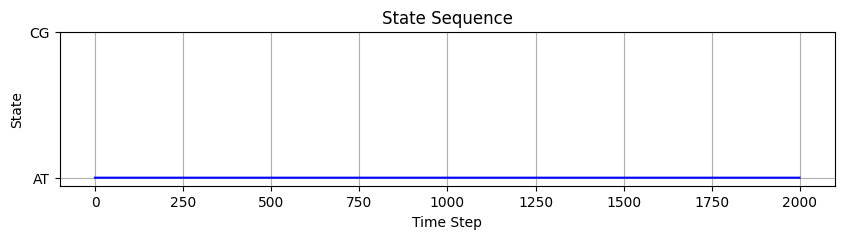

In [251]:
model, seq, states = dna_sequence_generator()

symbols = ['A', 'T', 'C', 'G']
labels = ['AT', 'CG']

print("Base:")
print(seq)
print("State:")
display_colored(states, labels)
display_states(states,labels)

## Part 4

•Implement the Viterbi algorithm for finding the most likely state sequence in an HMM.

In [252]:
def vit(x, state_labels, hmm, convert):
    T = len(x)
    n_states = len(state_labels)

    transmat = np.log(hmm.transmat_)
    emissionprob = np.log(hmm.emissionprob_)
    startprob = np.log(hmm.startprob_)

    viterbi = np.zeros((T, n_states))
    backpointer = np.zeros((T, n_states), dtype=int)

    for i in range(n_states):
        viterbi[0,i] = startprob[i] + emissionprob[i, convert[x[0]]]

    for t in range(1, T):
        for i in range(n_states):
            max_prob, max_state = max((viterbi[t-1, prev_i] + transmat[prev_i, i], prev_i) for prev_i in range(n_states))
            viterbi[t, i] = max_prob + emissionprob[i, convert[x[t]]]
            backpointer[t, i] = max_state
            
    best_path_point = np.argmax(viterbi[-1])
    best_path = [best_path_point]
    for t in range(T - 1, 0, -1):
        best_path.insert(0, backpointer[t, best_path[0]])

    best_path_new = [state_labels[state] for state in best_path]

    return best_path_new



•Test it on the output from your dishonest casino and your DNA sequence generator, how
does it compare?

True State Sequence:
F F F L L L L L F F F F F F F L L L L L F F F L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L F F F 


C:\Users\willi\AppData\Local\Temp\ipykernel_35104\3932578379.py:7: RuntimeWarning: divide by zero encountered in log
  startprob = np.log(hmm.startprob_)


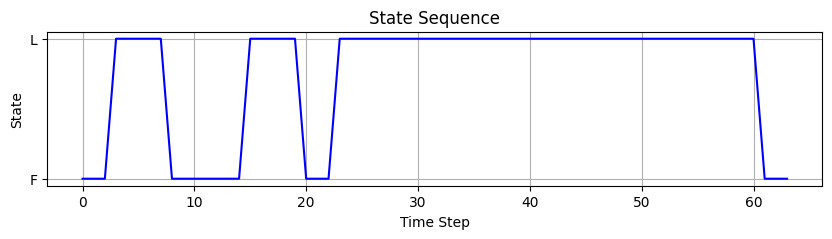

Most Likely State Sequence:
F F F F F F F L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L L 


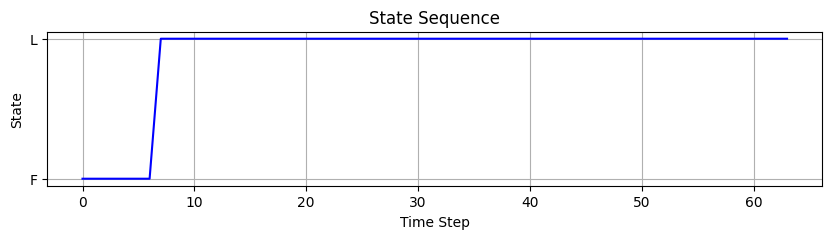

In [253]:
labels = ['F', 'L']

dice_dict = {1:0,2:1,3:2,4:3,5:4,6:5}
model, seq, states = dishonest_casino()
most_likely_states = vit(seq, labels, model, dice_dict)

print("True State Sequence:")
display_colored(states, labels)
display_states(states, labels)

print("Most Likely State Sequence:")
display_colored(most_likely_states, labels)
display_states(most_likely_states, labels)

True State Sequence:
CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG C

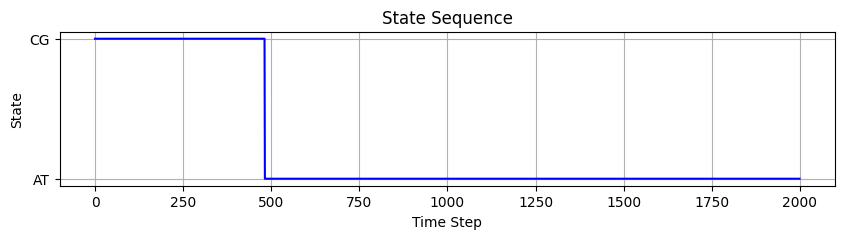

Most Likely State Sequence:
CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG CG 

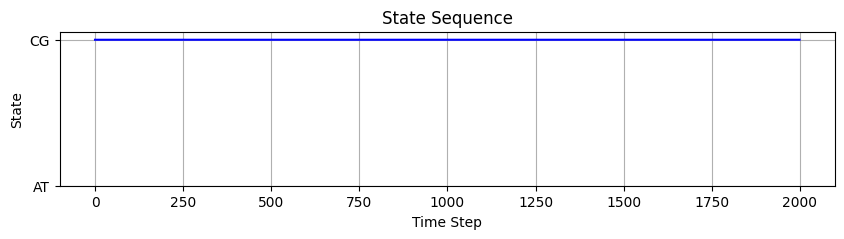

In [254]:
labels = ['AT', 'CG']

model, seq, states = dna_sequence_generator()
dna_dict = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
most_likely_states = vit(seq, labels, model, dna_dict)

print("True State Sequence:")
display_colored(states, labels)
display_states(states, labels)

print("Most Likely State Sequence:")
display_colored(most_likely_states, labels)
display_states(most_likely_states, labels)

•Run this on the genome for the lambda phage, a virus that infects E. coli bacteria

['CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG

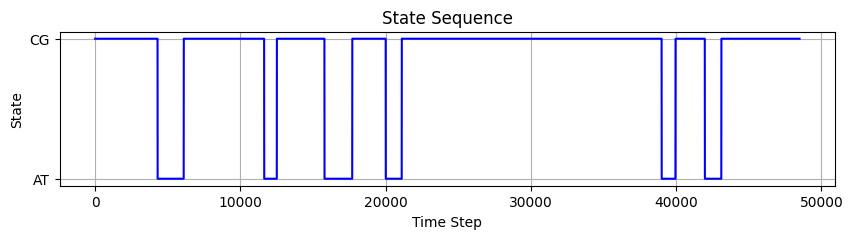

In [255]:
file_path = 'enteriobacteriophage.txt'
with open(file_path, 'r') as file:
    dna_sequence = file.read().replace('\n', '')

state_labels = ['AT', 'CG']

most_likely_states = vit(dna_sequence, state_labels, model, dna_dict)

print(most_likely_states)

print("Most Likely State Sequence:")
# display_colored(most_likely_states, state_labels)
display_states(most_likely_states, state_labels)

•Can you calculate the posterior probability of the path?